In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
col_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(url, names=col_names)
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
df.isnull().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [30]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [31]:
X = df.drop('Rings', axis = 1)
Y = df['Rings']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test)

(3341, 8) (3341,)
(836, 8) 668     13
1580     8
3784    11
463      5
2615    12
        ..
575     11
3231    12
1084     7
290     17
2713     4
Name: Rings, Length: 836, dtype: int64


In [33]:
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82.7131 - mae: 8.3131 - val_loss: 27.1096 - val_mae: 4.2554
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.6500 - mae: 3.5452 - val_loss: 8.5103 - val_mae: 2.0855
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 9.1356 - mae: 1.9929 - val_loss: 5.9601 - val_mae: 1.7255
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 6.7801 - mae: 1.7040 - val_loss: 5.5735 - val_mae: 1.6910
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 5.9385 - mae: 1.6690 - val_loss: 5.3752 - val_mae: 1.6292
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 5.4041 - mae: 1.6470 - val_loss: 5.2825 - val_mae: 1.5821
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 4.8574 - mae: 1.5663 - val_loss: 5.1670 - val_mae: 1.5836
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 4.7661 - mae: 1.5459 - val_loss: 5.0691 - val_mae: 1.6229
Epoch 9/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/ste

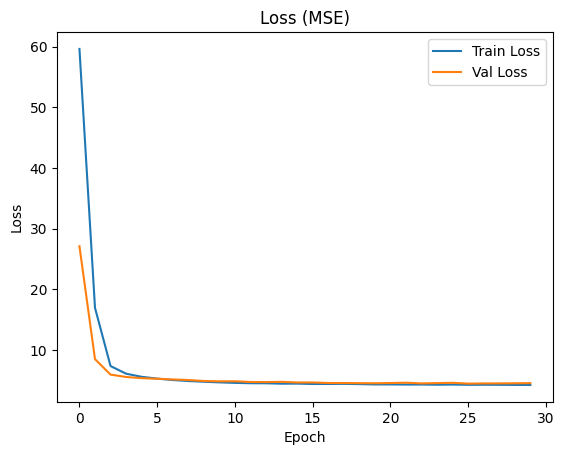

In [34]:
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Val Loss')
plt.title("Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [35]:
Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

mae = mean_absolute_error(Y_test, Y_pred)

print("예측 평균 오차 (RMSE):", round(rmse, 2)) #예측 실제값 차이
print("예측 평균 오차 (MAE):", round(mae, 2)) #얼마나 틀렸는지

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
예측 평균 오차 (RMSE): 2.14
예측 평균 오차 (MAE): 1.5
